https://www.cnblogs.com/pinard/p/6164214.html

kmeans 优化

In [1]:
####################################################################
# 4.1 聚类分析
# 导入库
import numpy as np  # 导入numpy库
import matplotlib.pyplot as plt  # 导入matplotlib库
from sklearn.cluster import KMeans  # 导入sklearn聚类模块
from sklearn import metrics  # 导入sklearn效果评估模块

In [2]:
# 数据准备
raw_data = np.loadtxt('cluster.txt')  # 导入数据文件
X = raw_data[:, :-1]  # 分割要聚类的数据
y_true = raw_data[:, -1]

In [3]:
# 训练聚类模型
n_clusters = 3  # 设置聚类数量
model_kmeans = KMeans(n_clusters=n_clusters, random_state=0)  # 建立聚类模型对象
model_kmeans.fit(X)  # 训练聚类模型
y_pre = model_kmeans.predict(X)  # 预测聚类模型

In [4]:
# 模型效果指标评估
n_samples, n_features = X.shape  # 总样本量,总特征数
inertias = model_kmeans.inertia_  # 样本距离最近的聚类中心的总和
adjusted_rand_s = metrics.adjusted_rand_score(y_true, y_pre)  # 调整后的兰德指数
mutual_info_s = metrics.mutual_info_score(y_true, y_pre)  # 互信息
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y_true, y_pre)  # 调整后的互信息
homogeneity_s = metrics.homogeneity_score(y_true, y_pre)  # 同质化得分
completeness_s = metrics.completeness_score(y_true, y_pre)  # 完整性得分
v_measure_s = metrics.v_measure_score(y_true, y_pre)  # V-measure得分
silhouette_s = metrics.silhouette_score(X, y_pre, metric='euclidean')  # 平均轮廓系数
calinski_harabaz_s = metrics.calinski_harabaz_score(X, y_pre)  # Calinski和Harabaz得分
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('ine\tARI\tMI\tAMI\thomo\tcomp\tv_m\tsilh\tc&h')  # 打印输出指标标题
print ('%d %.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%d' % (
inertias, adjusted_rand_s, mutual_info_s, adjusted_mutual_info_s, homogeneity_s, completeness_s, v_measure_s,
silhouette_s, calinski_harabaz_s))  # 打印输出指标值
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ine \t inertias')
print ('ARI \t adjusted_rand_s')
print ('MI \t mutual_info_s')
print ('AMI \t adjusted_mutual_info_s')
print ('homo \t homogeneity_s')
print ('comp \t completeness_s')
print ('v_m \t v_measure_s')
print ('silh \t silhouette_s')
print ('c&h \t calinski_harabaz_s')


samples: 1000 	 features: 2
----------------------------------------------------------------------
ine	ARI	MI	AMI	homo	comp	v_m	silh	c&h
300 0.96	1.03	0.94	0.94	0.94	0.94	0.63	2860
----------------------------------------------------------------------
short name 	 full name
ine 	 inertias
ARI 	 adjusted_rand_s
MI 	 mutual_info_s
AMI 	 adjusted_mutual_info_s
homo 	 homogeneity_s
comp 	 completeness_s
v_m 	 v_measure_s
silh 	 silhouette_s
c&h 	 calinski_harabaz_s


/usr/local/lib/python2.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


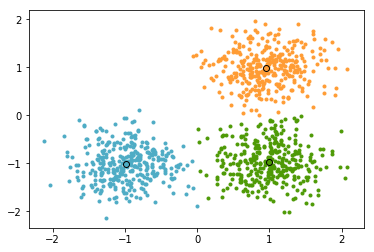

In [6]:
# 模型效果可视化
centers = model_kmeans.cluster_centers_  # 各类别中心
colors = ['#4EACC5', '#FF9C34', '#4E9A06']  # 设置不同类别的颜色
plt.figure()  # 建立画布
for i in range(n_clusters):  # 循环读类别
    index_sets = np.where(y_pre == i)  # 找到相同类的索引集合
    cluster = X[index_sets]  # 将相同类的数据划分为一个聚类子集
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')  # 展示聚类子集内的样本点
    plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor=colors[i], markeredgecolor='k',
             markersize=6)  # 展示各聚类子集的中心
plt.show()  # 展示图像

In [7]:
# 模型应用
new_X = np.array([1, 3.6])
new_X = new_X.reshape((1,2))
cluster_label = model_kmeans.predict(new_X)
print ('cluster of new data point is: %d' % cluster_label)

cluster of new data point is: 1


<img src='k_mean.png'>

In [128]:
def prepare_data(data):
    x = data[:, :2]
    y = data[:, -1]
    return x, y

def distance(x, y):
    # define distance in x and y
    return np.sqrt(sum(np.power(x - y, 2)))

def randomCenter(data, category_num):
    # init center
    mean = np.mean(data, axis = 0)
    std = np.std(data, axis = 0)
    centers = np.random.randn(category_num,1) * std + mean
    return centers

def K_mean(data, category_num):
    m, _ = data.shape
    clusterAssment = np.mat(np.zeros((m, 3)))
    centroids = randomCenter(data, category_num)
    clusterStatus = True
    while clusterStatus:
        clusterStatus = False
        # update cluster of data
        for i in xrange(m):
            minDist = float('inf'); minCluster = -1
            for j in xrange(category_num):
                distIj = distance(data[i,:], centroids[j])
                if distIj < minDist:
                    minDist = distIj; minCluster = j
                clusterStatus = True if clusterAssment[i,2] != minCluster else False
            clusterAssment[i,:] = data[i,0], data[i,1], minCluster 
        # update cluster center
        for category in xrange(category_num):
            cluster = clusterAssment[:,2]==category
            True_cluster = clusterAssment[np.nonzero(cluster)[0]]
            centroids[category,:] = np.squeeze(np.asarray((np.mean(True_cluster, axis=0))))[:-1]
    return centroids, clusterAssment

def draw_cluster(data, centers, category_num):
    import matplotlib.pyplot as plt
    colors = ['#4EACC5', '#FF9C34', '#4E9A06'] 
    plt.figure() 
    A = np.squeeze(np.asarray(clustAssing))
    for i in range(category_num):
        index_sets = np.where(A[:, [2]] == i) 
        cluster = A[:, [0,1]][list(index_sets[0]),:]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.') 
        plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor=colors[i], markeredgecolor='k', markersize=6) 
    plt.show()  

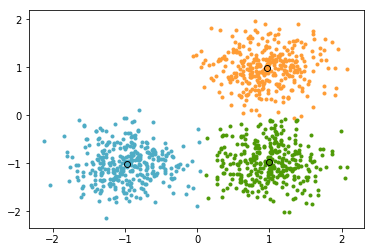

In [129]:
from collections import  Counter
raw_data = np.loadtxt('cluster.txt')
x, y_test = prepare_data(raw_data)
category_num = len(Counter(y_test))
myCentroids, clustAssing = K_mean(x, category_num)
draw_cluster(clustAssing, myCentroids, category_num)